In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [5]:
import requests
requests.__version__

'2.24.0'

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 39.72,
  'feels_like': 29.68,
  'temp_min': 37,
  'temp_max': 42.8,
  'pressure': 1016,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 280},
 'clouds': {'all': 1},
 'dt': 1606620519,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1606564276,
  'sunset': 1606598035},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Get the JSON data.
boston_data = city_weather.json()

In [11]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 42.8 60 1 10.29


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | beloha
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | belaya gora
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | kulhudhuffushi
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | port augusta
Processing Record 16 of Set 1 | hambantota
Processing Record 17 of Set 1 | banda aceh
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | nikolskoye
P

Processing Record 37 of Set 4 | kpandae
Processing Record 38 of Set 4 | bubaque
Processing Record 39 of Set 4 | turayf
Processing Record 40 of Set 4 | fort nelson
Processing Record 41 of Set 4 | taiyuan
Processing Record 42 of Set 4 | lahore
Processing Record 43 of Set 4 | nandi
Processing Record 44 of Set 4 | acapulco
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | virginia beach
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | sapele
Processing Record 50 of Set 4 | asfi
Processing Record 1 of Set 5 | san juan bautista
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | angra
City not found. Skipping...
Processing Record 4 of Set 5 | mogadishu
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | fare
Processing Record 7 of Set 5 | oistins
Processing Record 8 of Set 5 | severobaykalsk
Processing Record 9 of Set 5 | jiddah
City not found. Skipping...

Processing Record 28 of Set 8 | dwarka
Processing Record 29 of Set 8 | raudeberg
Processing Record 30 of Set 8 | antibes
Processing Record 31 of Set 8 | tunduru
City not found. Skipping...
Processing Record 32 of Set 8 | ambilobe
Processing Record 33 of Set 8 | krasnogorskoye
Processing Record 34 of Set 8 | bocas del toro
Processing Record 35 of Set 8 | chaiyaphum
Processing Record 36 of Set 8 | milkovo
Processing Record 37 of Set 8 | antofagasta
Processing Record 38 of Set 8 | kalamnuri
Processing Record 39 of Set 8 | nagato
Processing Record 40 of Set 8 | chicama
Processing Record 41 of Set 8 | salvador
Processing Record 42 of Set 8 | guerrero negro
Processing Record 43 of Set 8 | okhotsk
Processing Record 44 of Set 8 | lensk
Processing Record 45 of Set 8 | viedma
Processing Record 46 of Set 8 | comodoro rivadavia
Processing Record 47 of Set 8 | aleksandrov gay
Processing Record 48 of Set 8 | bograd
Processing Record 49 of Set 8 | tessalit
Processing Record 50 of Set 8 | panshi
Proce

Processing Record 11 of Set 12 | katherine
Processing Record 12 of Set 12 | glendive
Processing Record 13 of Set 12 | kogon
Processing Record 14 of Set 12 | shache
Processing Record 15 of Set 12 | sistranda
Processing Record 16 of Set 12 | antalaha
Processing Record 17 of Set 12 | jamsa
Processing Record 18 of Set 12 | diapaga
Processing Record 19 of Set 12 | borovskoy
Processing Record 20 of Set 12 | manta
Processing Record 21 of Set 12 | wana
Processing Record 22 of Set 12 | pisco
Processing Record 23 of Set 12 | chara
Processing Record 24 of Set 12 | onda
Processing Record 25 of Set 12 | nova olimpia
Processing Record 26 of Set 12 | jiayuguan
Processing Record 27 of Set 12 | kharp
Processing Record 28 of Set 12 | high level
Processing Record 29 of Set 12 | lander
Processing Record 30 of Set 12 | verkhnevilyuysk
Processing Record 31 of Set 12 | chapais
Processing Record 32 of Set 12 | caraballeda
Processing Record 33 of Set 12 | makakilo city
Processing Record 34 of Set 12 | tuyan
Pr

In [13]:
len(city_data)

544

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,17.60,52,29,9.17,GL,2020-11-29 03:29:29
1,Beloha,-25.17,45.05,72.77,90,45,7.52,MG,2020-11-29 03:29:55
2,Yellowknife,62.46,-114.35,6.80,84,75,10.29,CA,2020-11-29 03:29:35
3,Belaya Gora,68.53,146.42,-14.44,90,100,5.57,RU,2020-11-29 03:29:56
4,Hermanus,-34.42,19.23,51.01,93,41,6.49,ZA,2020-11-29 03:29:26
5,Klaksvik,62.23,-6.59,42.80,87,100,14.99,FO,2020-11-29 03:29:56
6,Narsaq,60.92,-46.05,32.00,93,78,10.29,GL,2020-11-29 03:29:41
7,Kulhudhuffushi,6.62,73.07,82.92,63,24,8.32,MV,2020-11-29 03:29:56
8,Hilo,19.73,-155.09,78.80,61,1,8.05,US,2020-11-29 03:29:27
9,Avarua,-21.21,-159.78,80.60,88,100,11.41,CK,2020-11-29 03:29:30


In [15]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2020-11-29 03:29:29,65.61,-37.64,17.60,52,29,9.17
1,Beloha,MG,2020-11-29 03:29:55,-25.17,45.05,72.77,90,45,7.52
2,Yellowknife,CA,2020-11-29 03:29:35,62.46,-114.35,6.80,84,75,10.29
3,Belaya Gora,RU,2020-11-29 03:29:56,68.53,146.42,-14.44,90,100,5.57
4,Hermanus,ZA,2020-11-29 03:29:26,-34.42,19.23,51.01,93,41,6.49
5,Klaksvik,FO,2020-11-29 03:29:56,62.23,-6.59,42.80,87,100,14.99
6,Narsaq,GL,2020-11-29 03:29:41,60.92,-46.05,32.00,93,78,10.29
7,Kulhudhuffushi,MV,2020-11-29 03:29:56,6.62,73.07,82.92,63,24,8.32
8,Hilo,US,2020-11-29 03:29:27,19.73,-155.09,78.80,61,1,8.05
9,Avarua,CK,2020-11-29 03:29:30,-21.21,-159.78,80.60,88,100,11.41


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

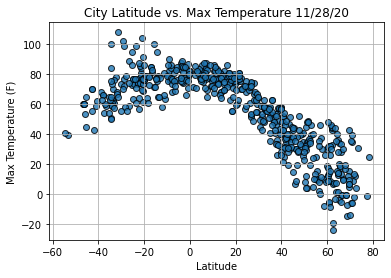

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

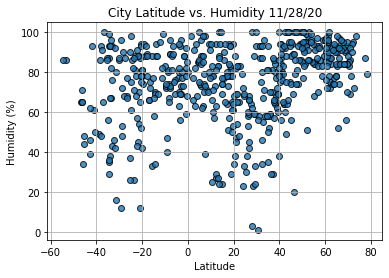

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

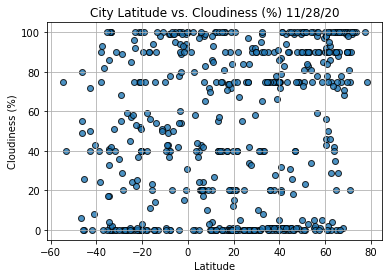

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

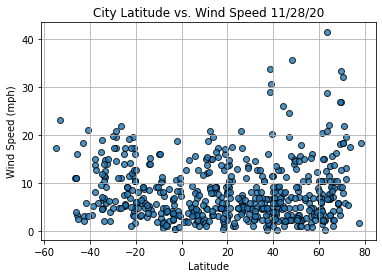

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2020-11-29 03:29:29,65.61,-37.64,17.60,52,29,9.17
2,Yellowknife,CA,2020-11-29 03:29:35,62.46,-114.35,6.80,84,75,10.29
3,Belaya Gora,RU,2020-11-29 03:29:56,68.53,146.42,-14.44,90,100,5.57
5,Klaksvik,FO,2020-11-29 03:29:56,62.23,-6.59,42.80,87,100,14.99
6,Narsaq,GL,2020-11-29 03:29:41,60.92,-46.05,32.00,93,78,10.29


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

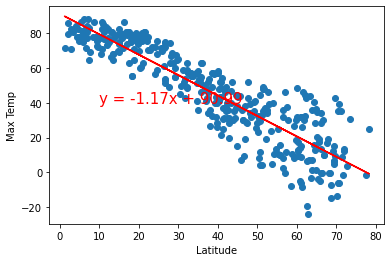

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

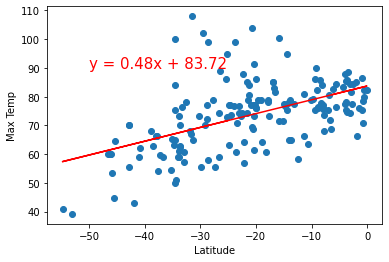

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

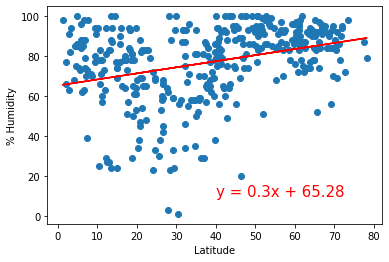

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

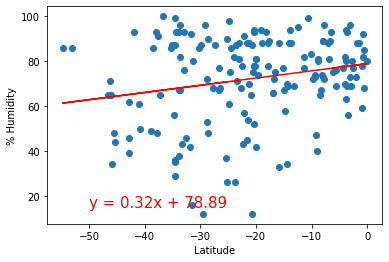

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

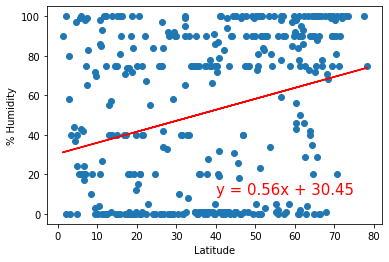

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(40,10))

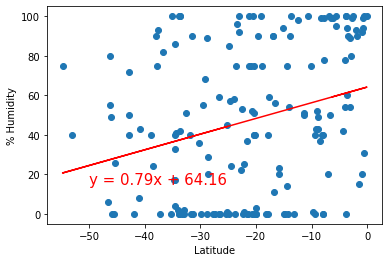

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Humidity',(-50,15))

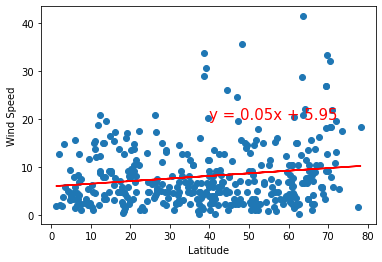

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))

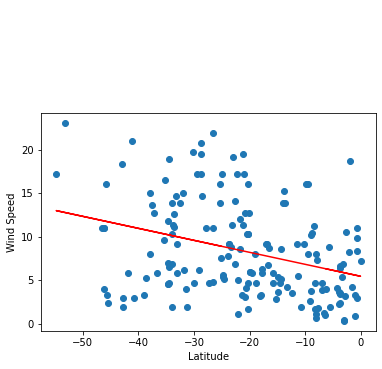

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))